In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("/Users/soycheeto/Desktop/ds/Program8_Titanic.csv")
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df['Survived'] = df['Sur'].map({'M': 1, 'B': 0})
y = df['diagnosis']
x = df.drop('diagnosis', axis=1)

In [10]:
x = x.fillna(x.mean())


In [11]:
# Step 4: Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.42864701 0.18376792]


In [14]:
# Step 6: Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)

In [15]:
# Step 7: Train Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Step 8: Evaluate the model
y_pred = model.predict(x_test)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))

Accuracy after PCA: 0.9707602339181286


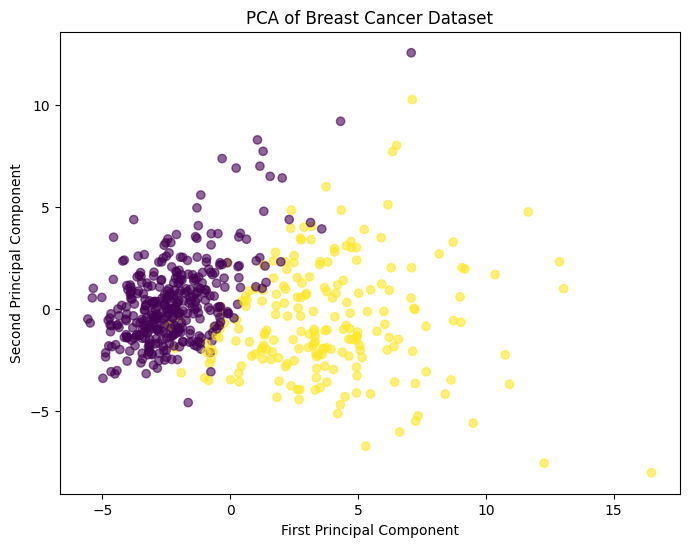

In [17]:
# Step 9: Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

np.float64(0.0839458172231986)

In [21]:
# Step 10: Predict for new patient
new_patient = [[15.0, 20.0, 70.0, 800.0, 0.1, 0.2, 0.3, 0.1, 0.2, 0.1,
                0.5, 0.6, 0.7, 1000.0, 0.05, 0.15, 0.25, 0.05, 0.15, 0.05,
                20.0, 25.0, 80.0, 1200.0, 0.12, 0.22, 0.32, 0.12, 0.22, 0.12,df['fractal_dimension_worst'].mean()]]

In [22]:
# Validate input size
if len(new_patient[0]) != x.shape[1]:
    print(f"Error: Expected {x.shape[1]} features, but got {len(new_patient[0])}.")
else:
    new_scaled = scaler.transform(new_patient)
    new_pca = pca.transform(new_scaled)
    prediction = model.predict(new_pca)
    print("Prediction for new patient:", "Malignant" if prediction[0] == 1 else "Benign")

Prediction for new patient: Benign


/Users/soycheeto/Desktop/ds/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
